In [77]:
# 科学计算模块
import numpy as np
import pandas as pd

# 绘图模块
import matplotlib as mpl
import matplotlib.pyplot as plt

# 自定义模块
from ML_basic_function import *

### 定义决策边界绘制函数

In [78]:
# 利用meshgrid函数创建区域点图
x1, x2 = np.meshgrid(np.arange(3), np.arange(1, 4))
[x1, x2]

[array([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]),
 array([[1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]])]

In [79]:
np.concatenate([x1.reshape(-1, 1), x2.reshape(-1, 1), np.ones(shape=(9, 1))], 1)

array([[0., 1., 1.],
       [1., 1., 1.],
       [2., 1., 1.],
       [0., 2., 1.],
       [1., 2., 1.],
       [2., 2., 1.],
       [0., 3., 1.],
       [1., 3., 1.],
       [2., 3., 1.]])

In [80]:
def logit_DB(X, w, y):
    """
    逻辑回归决策边界绘制函数
    """

    # 以两个特征的极值+1/-1作为边界，并在其中添加1000个点
    x1, x2 = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 1000).reshape(-1,1),
                        np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 1000).reshape(-1,1))

    # 将所有点的横纵坐标转化成二维数组
    X_temp = np.concatenate([x1.reshape(-1, 1), x2.reshape(-1, 1), np.ones(shape=(1000000, 1))], 1)

    # 对所有点进行逻辑回归预测
    y_hat_temp = logit_cla(sigmoid(X_temp.dot(w)))
    yhat = y_hat_temp.reshape(x1.shape)

    # 绘制决策边界图像
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#90CAF9'])
    plt.contourf(x1, x2, yhat, cmap=custom_cmap)

### 决策边界绘制

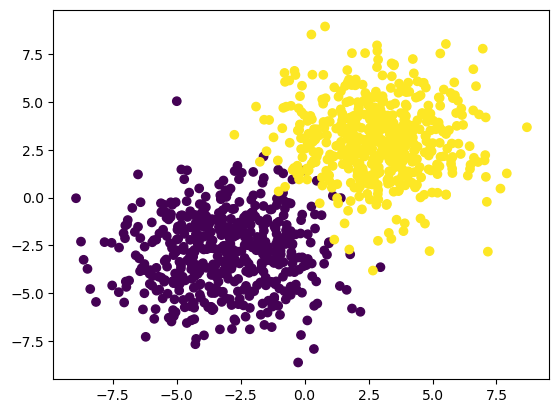

In [81]:
# 设置随机数种子
np.random.seed(24)

# 创建数据
f, l = arrayGenCla(num_class = 2, deg_dispersion = [6, 2], bias = True) # 离散程度较小

# 设置随机数种子
np.random.seed(24)

# 数据切分
Xtrain, Xtest, ytrain, ytest = array_split(f, l)

mean_ = Xtrain[:, :-1].mean(axis=0)
std_ = Xtrain[:, :-1].std(axis=0)

Xtrain[:, :-1] = (Xtrain[:, :-1] - mean_) / std_
Xtest[:, :-1] = (Xtest[:, :-1] - mean_) / std_

# 观察数据集整体情况
plt.scatter(f[:, 0], f[:, 1], c=l)

In [82]:
# 设置随机数种子
np.random.seed(24)

# 核心参数
batch_size = 50
num_epoch = 200
lr_init = 0.2

# 参数初始值
n = f.shape[1]
w = np.random.randn(n, 1)

# 记录迭代过程模型准确率计算结果
train_acc = []
test_acc = []

lr_lambda = lambda epoch: 0.95 ** epoch

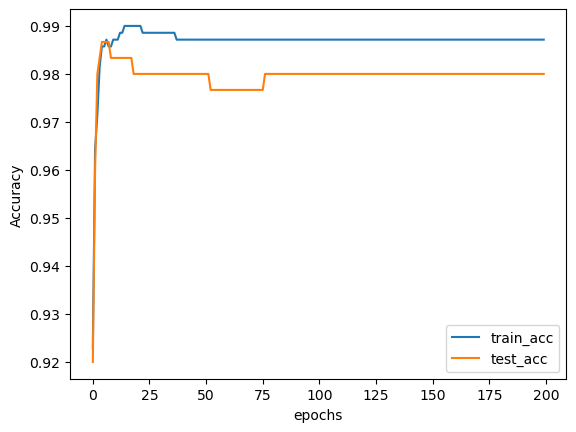

In [83]:
# 模型训练
for i in range(num_epoch):
    w = sgd_cal(Xtrain, w, ytrain, logit_gd, batch_size=batch_size, epoch=1, lr=lr_init*lr_lambda(i))
    train_acc.append(logit_acc(Xtrain, w, ytrain, thr=0.5))
    test_acc.append(logit_acc(Xtest, w, ytest, thr=0.5))

# 观察计算结果
plt.plot(list(range(num_epoch)), np.array(train_acc).flatten(), label='train_acc')
plt.plot(list(range(num_epoch)), np.array(test_acc).flatten(), label='test_acc')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 4)

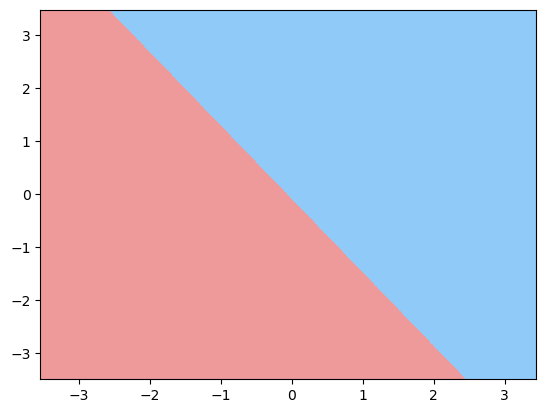

In [84]:
logit_DB(Xtrain, w, ytrain)

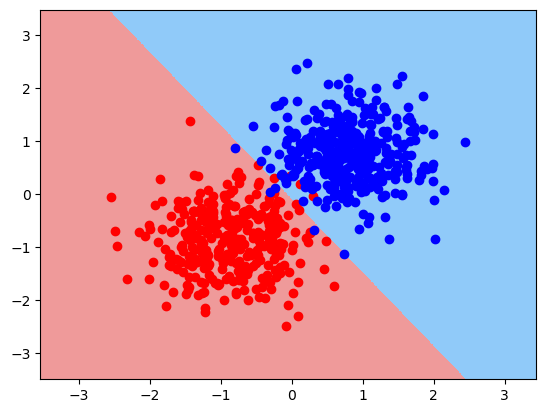

In [85]:
# 训练集上的决策边界
logit_DB(Xtrain, w, ytrain)
plt.scatter(Xtrain[(ytrain == 0).flatten(), 0], Xtrain[(ytrain == 0).flatten(), 1], color='red')
plt.scatter(Xtrain[(ytrain == 1).flatten(), 0], Xtrain[(ytrain == 1).flatten(), 1], color='blue')

In [86]:
# 布尔索引
(ytrain == 0).flatten()

array([ True,  True, False,  True,  True,  True, False,  True, False,
       False,  True,  True, False, False, False, False,  True, False,
       False, False, False,  True, False,  True, False, False, False,
        True,  True,  True, False,  True,  True, False, False,  True,
       False,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False, False,  True, False,  True, False,  True, False, False,
        True, False,  True, False, False,  True,  True, False,  True,
        True, False,  True, False,  True, False,  True, False,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
       False,  True,  True, False, False,  True, False, False,  True,
        True, False, False, False,  True, False, False, False,  True,
        True, False,

In [87]:
(ytrain == 0).sum()

np.int64(333)

In [88]:
Xtrain[(ytrain == 0).flatten(), :].shape

(333, 3)

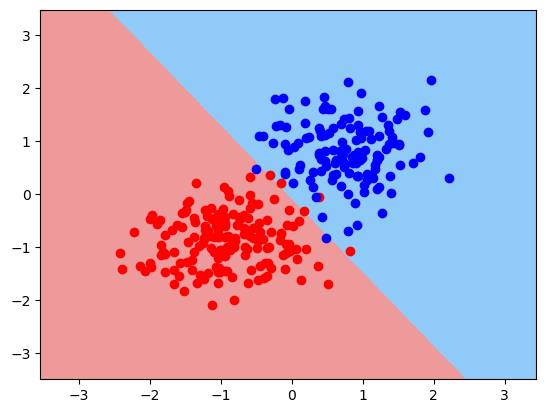

In [89]:
# 测试集上的决策边界
logit_DB(Xtrain, w, ytrain)
plt.scatter(Xtest[(ytest == 0).flatten(), 0], Xtest[(ytest == 0).flatten(), 1], color='red')
plt.scatter(Xtest[(ytest == 1).flatten(), 0], Xtest[(ytest == 1).flatten(), 1], color='blue')

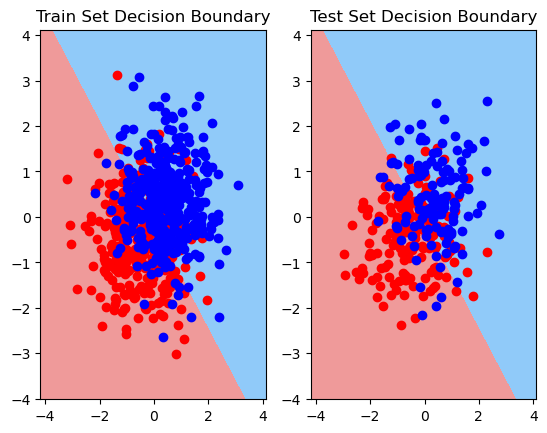

In [90]:
# 设置随机数种子
np.random.seed(24)

# 创建数据
f, l = arrayGenCla(num_class = 2, deg_dispersion = [4, 4], bias = True)          # 离散程度较小

# 设置随机数种子
np.random.seed(24)

# 数据切分
Xtrain, Xtest, ytrain, ytest = array_split(f, l)

mean_ = Xtrain[:, :-1].mean(axis=0)
std_ = Xtrain[:, :-1].std(axis=0)

Xtrain[:, :-1] = (Xtrain[:, :-1] - mean_) / std_
Xtest[:, :-1] = (Xtest[:, :-1] - mean_) / std_

# 设置随机数种子
np.random.seed(24)

# 核心参数
batch_size = 50
num_epoch = 200
lr_init = 0.2

# 参数初始值
n = f.shape[1]
w = np.random.randn(n, 1)

# 定义学习率衰减匿名函数
lr_lambda = lambda epoch: 0.95 ** epoch

# 模型训练
for i in range(num_epoch):
    w = sgd_cal(Xtrain, w, ytrain, logit_gd, batch_size=batch_size, epoch=1, lr=lr_init*lr_lambda(i))



# 训练集上的决策边界
plt.subplot(121)
plt.title('Train Set Decision Boundary')
logit_DB(Xtrain, w, ytrain)
plt.scatter(Xtrain[(ytrain == 0).flatten(), 0], Xtrain[(ytrain == 0).flatten(), 1], color='red')
plt.scatter(Xtrain[(ytrain == 1).flatten(), 0], Xtrain[(ytrain == 1).flatten(), 1], color='blue')

# 测试集上的决策边界
plt.subplot(122)
plt.title('Test Set Decision Boundary')
logit_DB(Xtrain, w, ytrain)
plt.scatter(Xtest[(ytest == 0).flatten(), 0], Xtest[(ytest == 0).flatten(), 1], color='red')
plt.scatter(Xtest[(ytest == 1).flatten(), 0], Xtest[(ytest == 1).flatten(), 1], color='blue')


### 特征可解释性探索

In [91]:
pd.read_csv('iris.csv')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [92]:
#提取特征
features_temp = pd.read_csv('iris.csv').iloc[:, 1: 3].values
features_temp[:10]

array([[3.5, 1.4],
       [3. , 1.4],
       [3.2, 1.3],
       [3.1, 1.5],
       [3.6, 1.4],
       [3.9, 1.7],
       [3.4, 1.4],
       [3.4, 1.5],
       [2.9, 1.4],
       [3.1, 1.5]])

In [93]:
#提取标签
labels_temp = pd.read_csv('iris.csv').iloc[:, -1].values
labels_temp

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [94]:
# 标签转化为数值（布尔索引）
labels_temp[labels_temp != 'Iris-setosa'] = 0
labels_temp[labels_temp == 'Iris-setosa'] = 1
labels_temp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object)

In [95]:
labels = labels_temp.astype(float).reshape(-1, 1)
labels

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [97]:
features = np.concatenate([features_temp, np.ones(shape=labels.shape)], 1)
features[:10]

array([[3.5, 1.4, 1. ],
       [3. , 1.4, 1. ],
       [3.2, 1.3, 1. ],
       [3.1, 1.5, 1. ],
       [3.6, 1.4, 1. ],
       [3.9, 1.7, 1. ],
       [3.4, 1.4, 1. ],
       [3.4, 1.5, 1. ],
       [2.9, 1.4, 1. ],
       [3.1, 1.5, 1. ]])

[[ 2.8630463 ]
 [-3.19680442]
 [ 0.01148845]]


Text(0.5, 1.0, 'Iris-setosa or not')

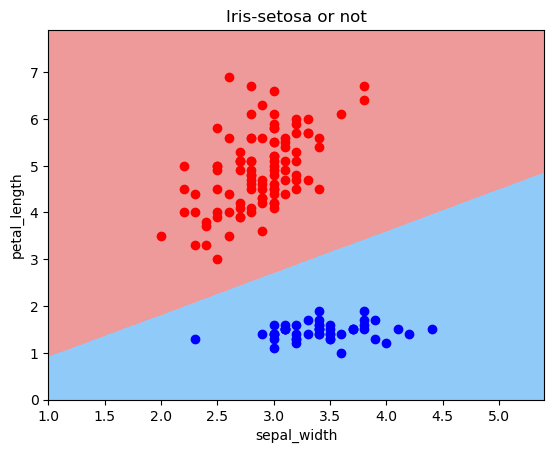

In [105]:
# 设置随机数种子
np.random.seed(24)

# 核心参数
batch_size = 10
num_epoch = 200
lr_init = 0.5

# 参数初始值
n = features.shape[1]
w = np.random.randn(n, 1)

# 定义学习率衰减匿名函数
lr_lambda = lambda epoch: 0.95 ** epoch

# 模型训练
for i in range(num_epoch):
    w = sgd_cal(features, w, labels, logit_gd, batch_size=batch_size, epoch=1, lr=lr_init*lr_lambda(i))

print(w)

# 绘制决策边界
logit_DB(features, w, labels)
plt.scatter(features[(labels == 0).flatten(), 0], features[(labels == 0).flatten(), 1], color='red')
plt.scatter(features[(labels == 1).flatten(), 0], features[(labels == 1).flatten(), 1], color='blue')
plt.xlabel('sepal_width')
plt.ylabel('petal_length')
plt.title('Iris-setosa or not')

[[ 20.27971792]
 [-16.6718256 ]
 [ -3.37333555]]


Text(0.5, 1.0, 'Iris-setosa or not')

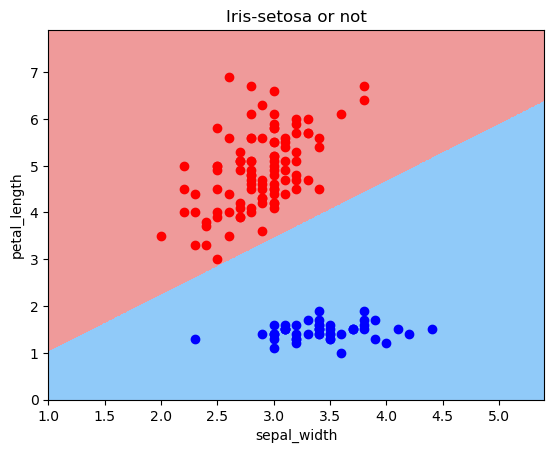

In [139]:
# 核心参数
batch_size = 10
num_epoch = 200
lr_init = 0.5

# 参数初始值
w = np.array([[30.0],[-1],[0]])

# 定义学习率衰减匿名函数
lr_lambda = lambda epoch: 0.95 ** epoch

# 设置随机数种子
np.random.seed(24)

# 模型训练
for i in range(num_epoch):
    w = sgd_cal(features, w, labels, logit_gd, batch_size=batch_size, epoch=1, lr=lr_init*lr_lambda(i))

print(w)

# 绘制决策边界
logit_DB(features, w, labels)
plt.scatter(features[(labels == 0).flatten(), 0], features[(labels == 0).flatten(), 1], color='red')
plt.scatter(features[(labels == 1).flatten(), 0], features[(labels == 1).flatten(), 1], color='blue')
plt.xlabel('sepal_width')
plt.ylabel('petal_length')
plt.title('Iris-setosa or not')